<div style="text-align: center;">
    <h1>Data Modeling and Analysis</h1>
</div>

![Alt text](../Images/6428197.jpg)

<center> <a href="https://www.freepik.com/free-vector/data-analysis-concept-illustration_21118602.htm#query=data%20analytics&position=30&from_view=keyword&track=ais&uuid=0839151a-1844-42c2-816b-2d6281f53fb5">Image by storyset</a> on Freepik</center>

<h3>This notebook is dedicated to modeling the data and extracting insights.</h3>
<h4>It includes the following steps as follows: </h4>
- Data Exploration: Delving into the dataset to understand its structure, features, and distributions.<br>
- Data Visualization: Presenting visual representations of the data to uncover patterns, trends, and relationships.<br>
- Conclusions: Drawing conclusions and insights based on the exploratory analysis and visualization results.<br>
Includes: Logistic Regression Model, KNN Model, Multinomial Naive Bayes (MNB) classifier, Random Forest Classifier Model 

#### Imports

In [2]:
#pip install wordcloud

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

#sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

#wordcloud
from wordcloud import WordCloud

#nltk
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### Load data and read it

In [2]:
df = pd.read_csv('../Analysis/data/processed_data.csv')

In [3]:
df.head()

,id,subreddit,title,selftext,time_now,time_difference,num_comments,upvote_ratio,url,hour_of_day,day_of_week
0,18888ww,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,Please use this thread to discuss your portfol...,2024-02-28 22:08:57.699800,89 days 12:08:33.699801,0.997462,1.317371,https://www.reddit.com/r/stocks/comments/18888...,10,4
1,1b22xgu,stocks,"r/Stocks Daily Discussion Wednesday - Feb 28, ...",These daily discussions run from Monday to Fri...,2024-02-28 22:08:57.699812,0 days 11:38:48.699813,0.448953,1.062718,https://www.reddit.com/r/stocks/comments/1b22x...,10,2
2,1b2dv7t,stocks,Google hit with $2.3 bln lawsuit by Axel Sprin...,https://www.reuters.com/technology/google-hit-...,2024-02-28 22:08:57.699817,0 days 03:21:32.699817,-0.317553,1.224770,https://www.reddit.com/r/stocks/comments/1b2dv...,18,2
3,1b2hsi4,stocks,Snowflake says Frank Slootman is retiring as C...,Snowflake said Wednesday that CEO Frank Slootm...,2024-02-28 22:08:57.699821,0 days 00:49:11.699822,-0.401939,1.247920,https://www.reddit.com/r/stocks/comments/1b2hs...,21,2
4,1b27suh,stocks,Stripe all but delays IPO. Valuation rises to ...,\n\nFeb 28 (Reuters) - Stripe's valuation surg...,2024-02-28 22:08:57.699826,0 days 07:19:22.699826,-0.329273,1.271070,https://www.reddit.com/r/stocks/comments/1b27s...,14,2


In [4]:
df.shape

(3772, 11)

In [5]:
'''This function will clean and normalize the text data to make 
it suitable for further analysis and modeling in NLP tasks. '''

def preprocess_text(text):
 
    # Lowercasing the text
    text = text.lower()
    # Removing special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

In [6]:
'''  
The code involves preparing the data through preprocessing steps and dividing it into
training and testing sets. Additionally, it creates a vectorizer object to transform
the text data into numerical representations appropriate for NLP tasks.
'''
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [7]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(df)

In [8]:
X_train

<3017x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 225548 stored elements in Compressed Sparse Row format>

#### Term Frequency-Inverse Document Frequency.

In [9]:
pd.DataFrame(X_train.toarray(), columns = vectorizer.get_feature_names_out())

,__source,_avgvol,_o,_of_,_pa,_sma,_u,aa,aapl,aautomoderator,...,yr,ytd,yuan,zacks,zalando,zee,zero,zillow,zoom,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.111348,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007196,0.0,0.0,...,0.0,0.007132,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [10]:
#saving it
td_idf_df = pd.DataFrame(X_train.toarray(), columns = vectorizer.get_feature_names_out())

#### Now sum the score of each td_idf word and generate the wordcloud

In [11]:
#sum the tdidf score
word_frequencies = td_idf_df.sum(axis = 0).to_dict()

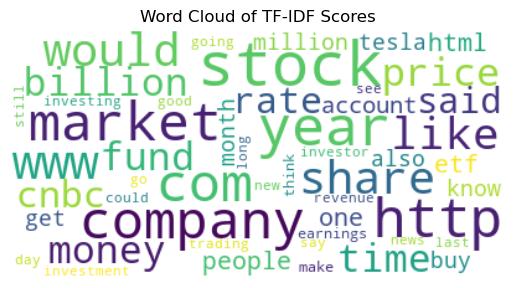

In [12]:
#Generate word_cloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50,
                      random_state=42).generate_from_frequencies(word_frequencies)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of TF-IDF Scores')
plt.axis("off")
plt.show()

#### Logistic Regression Model

In [13]:
#initialize the Logistic Regression Model
lrg = LogisticRegression()

In [14]:
#fit the model
lrg.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

   investing       0.68      0.73      0.71       381
      stocks       0.71      0.66      0.68       374

    accuracy                           0.69       755
   macro avg       0.69      0.69      0.69       755
weighted avg       0.69      0.69      0.69       755



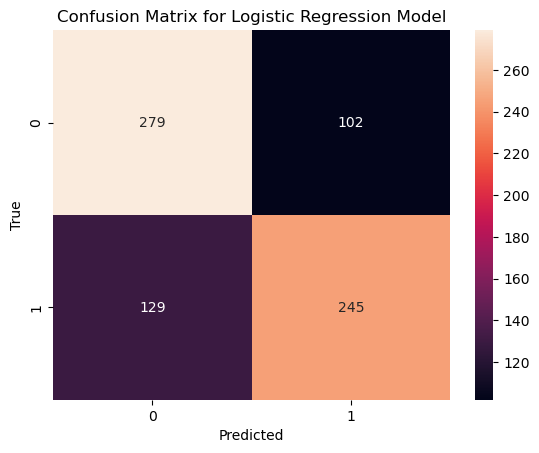

In [15]:
#making prediction
# Make predictions on the test set
y_pred_lr = lrg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Plot confusion matrix
cm_lrg = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lrg, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Performing hyperparameter tuning for a logistic regression model using grid search with cross-validation.

In [16]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters: ", grid_search.best_params_)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_lr))

Best Parameters:  {'C': 1, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

   investing       0.68      0.73      0.71       381
      stocks       0.71      0.66      0.68       374

    accuracy                           0.69       755
   macro avg       0.69      0.69      0.69       755
weighted avg       0.69      0.69      0.69       755



In [17]:
#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [18]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = lrg.coef_

for _, class_label in enumerate(lrg.classes_): 
    class_coefficients = coefficients[_]
    sorted_indices = np.argsort(class_coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()

Class: investing
Top Positive Influential Words: ['vehicle', 'hike', 'december', 'watching', 'january', 'position', 'increase', 'stupid', 'still', 'ticker', 'apple', 'trading', 'award', 'see', 'microsoft', 'fed', 'revenue', 'red', 'said', 'stock']
Top Negative Influential Words: ['investment', 'www', 'http', 'roth', 'bitcoin', 'tax', 'fund', 'ira', 'com', 'html', 'account', 'cnbc', 'coronavirus', 'invest', 'looking', 'bond', 'vanguard', 'order', 'couple', 'small']



IndexError: index 1 is out of bounds for axis 0 with size 1

In [19]:
for index, class_label in enumerate(lrg.classes_):
    class_coefficients = coefficients[index]
    sorted_indices = np.argsort(class_coefficients)

    # Top 20 Positive and Negative Words with Coefficients
    top_positive_words = {feature_names[i]: abs(class_coefficients[i]) for i in sorted_indices[-20:]}
    top_negative_words = {feature_names[i]: abs(class_coefficients[i]) for i in sorted_indices[:20]}

    # Generate Word Clouds for Positive and Negative Words
    wordcloud_positive = WordCloud(mode= "RGBA").generate_from_frequencies(top_positive_words)
    wordcloud_negative = WordCloud(mode= "RGBA").generate_from_frequencies(top_negative_words)

# Flatten the coefficients if required
flat_coefficients = coefficients.flatten()

# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(flat_coefficients, bins=30, kde=True, color='blue')
plt.title('Distribution of Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

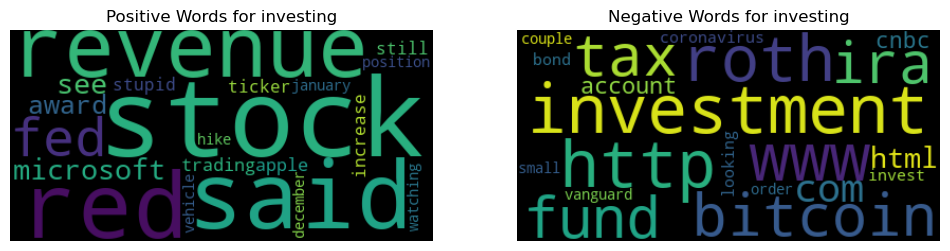

IndexError: index 1 is out of bounds for axis 0 with size 1

In [20]:
for index, class_label in enumerate(lrg.classes_):
    class_coefficients = coefficients[index]
    sorted_indices = np.argsort(class_coefficients)

    # Top 20 Positive and Negative Words with Coefficients
    top_positive_words = {feature_names[i]: abs(class_coefficients[i]) for i in sorted_indices[-20:]}
    top_negative_words = {feature_names[i]: abs(class_coefficients[i]) for i in sorted_indices[:20]}

    # Generate Word Clouds for Positive and Negative Words
    wordcloud_positive = WordCloud(mode= "RGBA").generate_from_frequencies(top_positive_words)
    wordcloud_negative = WordCloud(mode= "RGBA").generate_from_frequencies(top_negative_words)

    # Display Word Clouds
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title(f'Positive Words for {class_label}')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title(f'Negative Words for {class_label}')
    plt.axis("off")

    plt.show()

### Training : Naive bayes Regression Model

In [21]:
#Initializing Multinomial Naive Bayes Model
mnb = MultinomialNB()

In [22]:
#fit the model
mnb.fit(X_train, y_train)

MultinomialNB()

#### Evaluating a Multinomial Naive Bayes (MNB) classifier on a test set and plotting confusion metrix

              precision    recall  f1-score   support

   investing       0.65      0.75      0.70       381
      stocks       0.70      0.60      0.64       374

    accuracy                           0.67       755
   macro avg       0.68      0.67      0.67       755
weighted avg       0.68      0.67      0.67       755



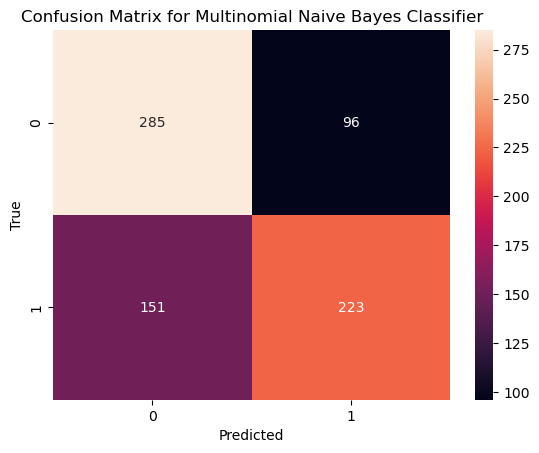

In [23]:
#predicting on the test set
y_pred_mnb = mnb.predict(X_test)

#print classification report
print(classification_report(y_test, y_pred_mnb))

#plotting the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d')
plt.title('Confusion Matrix for Multinomial Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
# Define a parameter grid for GridSearch
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
    }

# Initialize and perform the grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Re-evaluate using the best model
best_model = grid_search.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_mnb))

Best Parameters:  {'alpha': 0.1}
              precision    recall  f1-score   support

   investing       0.68      0.69      0.68       381
      stocks       0.67      0.67      0.67       374

    accuracy                           0.68       755
   macro avg       0.68      0.68      0.68       755
weighted avg       0.68      0.68      0.68       755



In [25]:
# Variables 

log_prob = mnb.feature_log_prob_ #There are no coefficients in Multinomial Naive Bayes, instead we have log probabilities

for _, class_label in enumerate(mnb.classes_):
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]]  # Top 20 words

    print(f"Class: {class_label}")
    print("Top Words:", top_words)
    print()

Class: investing
Top Words: ['ira', 'roth', 'investing', 'investment', 'share', 'html', 'etf', 'cnbc', 'account', 'money', 'like', 'fund', 'company', 'would', 'market', 'www', 'stock', 'year', 'com', 'http']

Class: stocks
Top Words: ['rate', 'earnings', 'people', 'revenue', 'million', 'tesla', 'time', 'www', 'would', 'like', 'said', 'billion', 'com', 'price', 'http', 'share', 'year', 'market', 'company', 'stock']



### Random Forest Classifier Model

In [26]:
#Initiate Randome Forest Classifier
rf = RandomForestClassifier()

In [27]:
#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
#make prediction
y_pred_rf = rf.predict(X_test)

In [29]:
#Printing classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

   investing       0.67      0.72      0.70       381
      stocks       0.69      0.64      0.66       374

    accuracy                           0.68       755
   macro avg       0.68      0.68      0.68       755
weighted avg       0.68      0.68      0.68       755



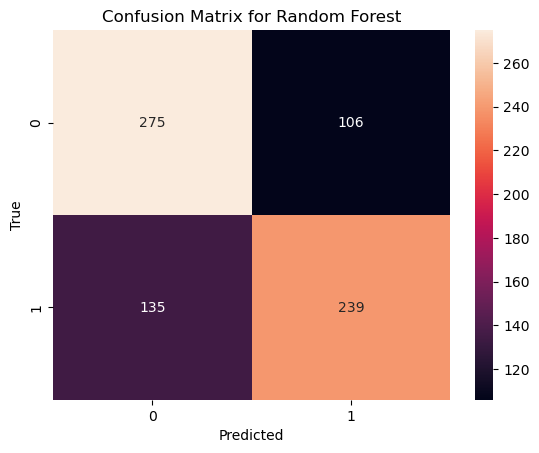

In [30]:
#plot confusion matrix for rf

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [31]:
# Get feature importances
importances = rf.feature_importances_

# Get indices of top 30 features
indices = np.argsort(importances)[-30:]

# Get top features and their importances
top_features = [(feature_names[i], importances[i]) for i in indices]

# Print top features and their importances
print("Top 30 Features and Their Importances:")
for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")

Top 30 Features and Their Importances:
new: 0.0025
according: 0.0025
time: 0.0025
announced: 0.0026
looking: 0.0026
like: 0.0028
back: 0.0030
trading: 0.0031
would: 0.0031
market: 0.0031
year: 0.0033
share: 0.0034
see: 0.0035
tax: 0.0036
price: 0.0040
said: 0.0040
roth: 0.0042
reported: 0.0042
revenue: 0.0042
cnbc: 0.0045
html: 0.0047
ira: 0.0048
company: 0.0048
account: 0.0055
www: 0.0065
investment: 0.0068
fund: 0.0071
com: 0.0080
stock: 0.0082
http: 0.0099


### Training K-Nearest Neighbors (KNN) model

In [32]:
#Initiate kNN 
'''n_neighbors=5 means that the algorithm will consider the 5 nearest neighbors 
   of a given data point when making predictions'''
knn = KNeighborsClassifier(n_neighbors=5)

#fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
#making predictions
y_pred_knn = knn.predict(X_test)

In [34]:
#printing classifier report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

   investing       0.60      0.80      0.68       381
      stocks       0.69      0.45      0.55       374

    accuracy                           0.63       755
   macro avg       0.64      0.62      0.61       755
weighted avg       0.64      0.63      0.61       755



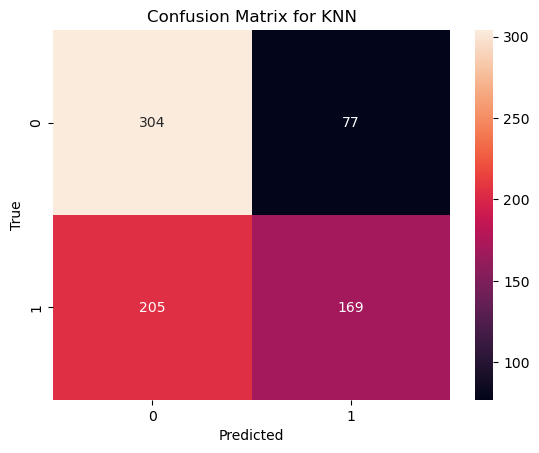

In [35]:
# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()